# Perkenalan

Muhammad Bintang Ramadhan  
Data Science Batch 08

### Problems

Sebuah lembaga LSM berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan sekitar $ 10 juta. CEO LSM tersebut perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini terkait dengan pemilihan negara mana yang paling membutuhkan bantuan.

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara tersebut. Anda diwajibkan untuk menyarankan negara mana yang perlu menjadi fokus CEO. Jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

# Import Pustaka

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
#Function untuk plot silhoutte
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

# Import Data

In [3]:
df_ori = pd.read_csv('Country-data.csv')
df = df_ori.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- Terdapat 167 data dari 10 Fitur
-  Tidak terdapat Missing Value
-   Memiliki tipe data float(7), integer (2), object(1)

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df[['country', 'income']].sort_values('income', ascending=True).head(10)

,country,income
37,"Congo, Dem. Rep.",609
88,Liberia,700
26,Burundi,764
112,Niger,814
31,Central African Republic,888
106,Mozambique,918
94,Malawi,1030
63,Guinea,1190
150,Togo,1210
132,Sierra Leone,1220


In [7]:
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


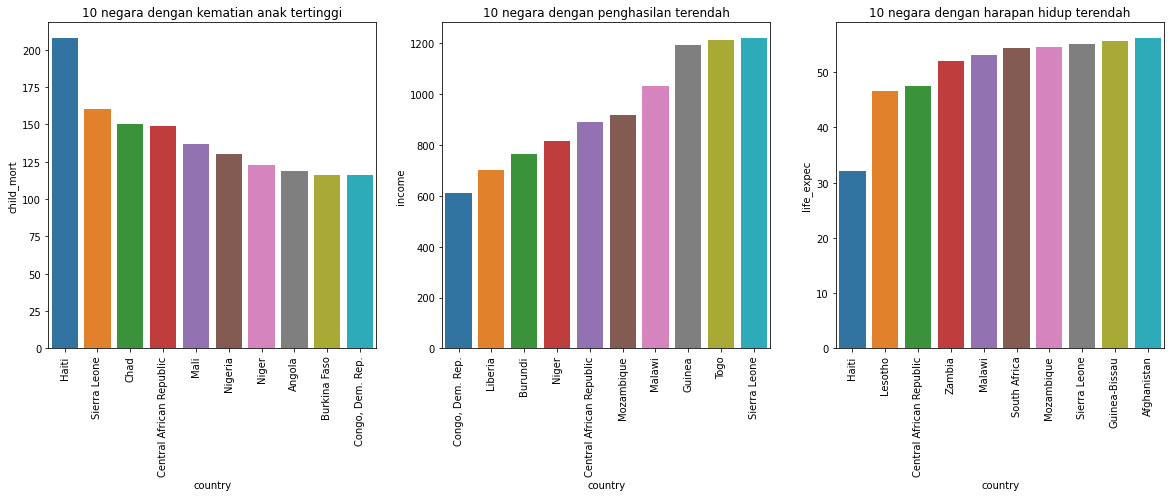

In [8]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
country_child_mort = df[['country', 'child_mort']].sort_values('child_mort', ascending=False).head(10)
sns.barplot(x='country', y='child_mort', data=country_child_mort)
plt.title('10 negara dengan kematian anak tertinggi')
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
country_income = df[['country', 'income']].sort_values('income', ascending=True).head(10)
sns.barplot(x='country', y='income', data=country_income)
plt.title('10 negara dengan penghasilan terendah')
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
country_life_expec = df[['country', 'life_expec']].sort_values('life_expec', ascending=True).head(10)
sns.barplot(x='country', y='life_expec', data=country_life_expec)
plt.title('10 negara dengan harapan hidup terendah')
plt.xticks(rotation = 90)

plt.show()

-   10 negara dengan kematian anak tertinggi, 10 negara dengan penghasilan terendah dan 10 negara dengan harapn hidup terndah lebih condong negara-neagara Afrika.

# Data Preprocessing

In [9]:
#numerik fitur
df_data = df.drop(columns=(['country']))

#kategorical fitur
country = df.country

## Scalling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
df_data = scaler.fit_transform(df_data)

## PCA

In [12]:
pca = PCA()
pca.fit(df_data)

PCA()

[0.55001227 0.6838601  0.80687063 0.9043611  0.94214073 0.97227732
 0.98418166 0.99305958 1.        ]


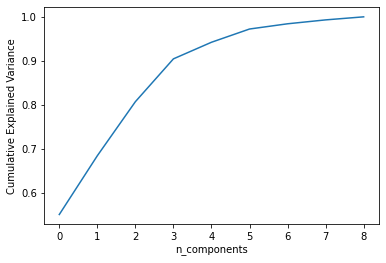

In [13]:
#Mencari nilai EVR dengan pengambilan keputusan menggunakan teknik elbow method
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
print(pca.explained_variance_ratio_.cumsum())


-   Berdasarkan elbhow method untuk melakukan reduksional dimensi, menurut saya nilai elbownya adalah 5. Dengan 5 fitur tersebut cukup mengambil keseluruhan informasi data.

In [14]:
pca_5 = PCA(n_components=5, whiten=True)

In [15]:
df_red = pca_5.fit_transform(df_data)

# Model

## KMeans

### Elbow Method

Mencari nilai K

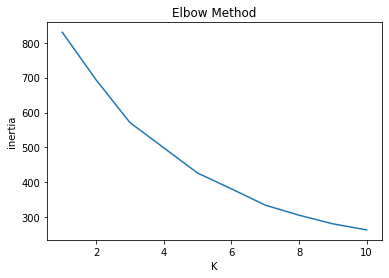

In [16]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(df_red)
    inertia.append(kmeans.inertia_)


plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

Untuk menentukan nilai n_clusters bisa mengacu pada metriks dari elbow method  
-   Dari plot elbow method diatas menurut saya nilainya adalah 5 karena memiliki lekukan siku, namun siku dari plot tersebut dirasa masih meragukan maka untuk memvalidasi argumen ini saya akan menggunakan teknik silhouette sebagai validatornya.

### Silhouette Method

In [17]:
k=range(2,8)

For n_clusters = 2 The average silhouette_score is : 0.22161749294886368
For n_clusters = 3 The average silhouette_score is : 0.27503718040291847
For n_clusters = 4 The average silhouette_score is : 0.28855913442841685
For n_clusters = 5 The average silhouette_score is : 0.2964735619847686
For n_clusters = 6 The average silhouette_score is : 0.2639869680666723
For n_clusters = 7 The average silhouette_score is : 0.23664115841187416


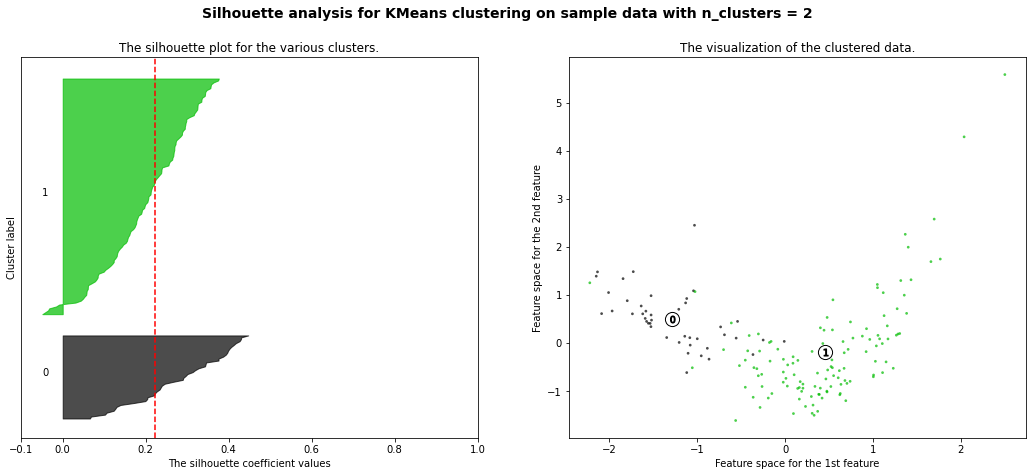

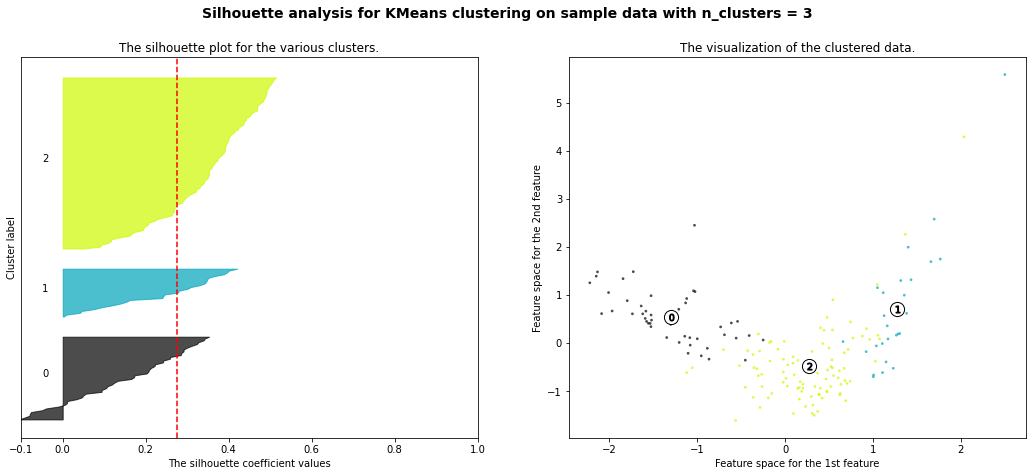

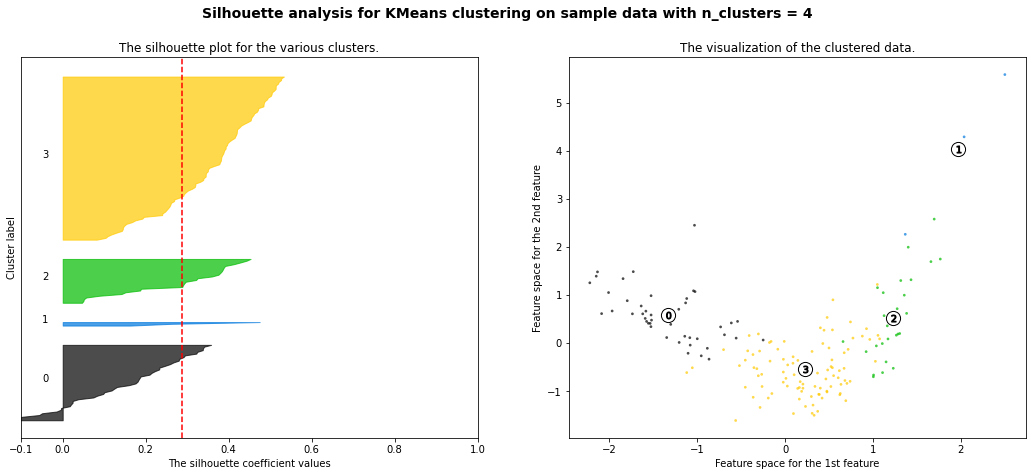

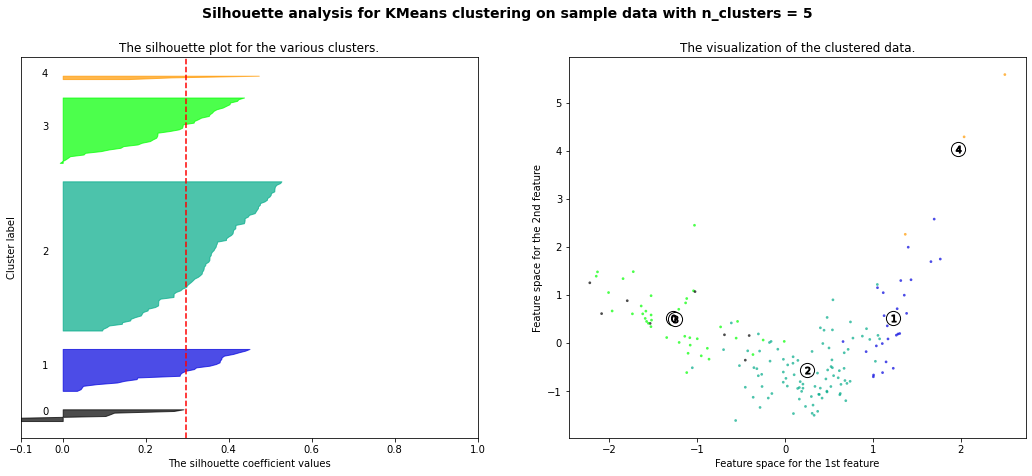

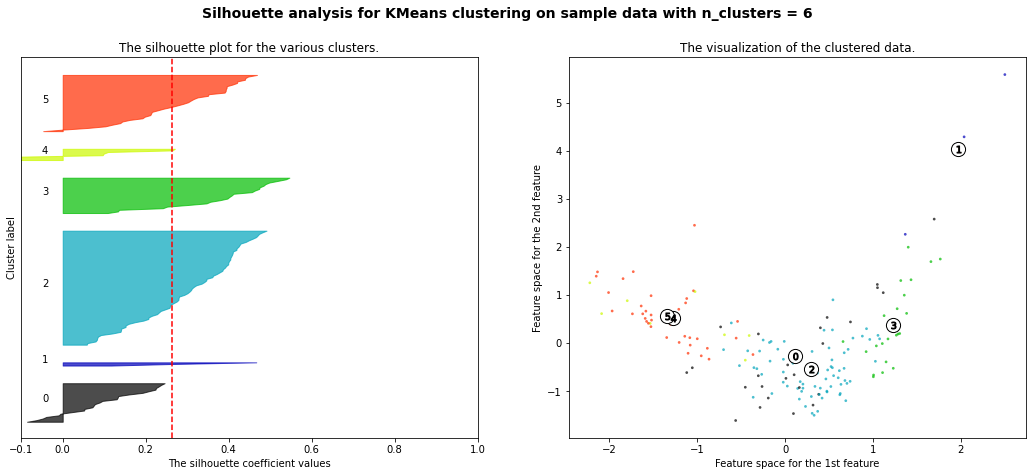

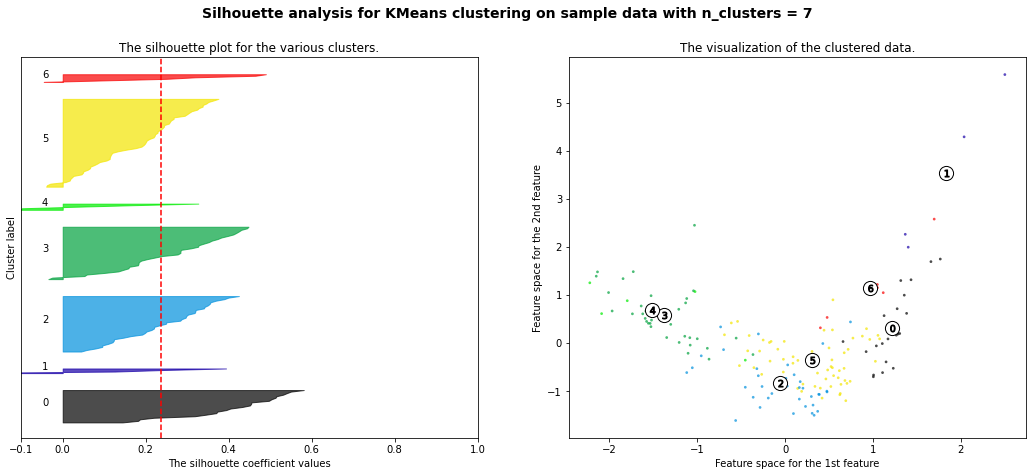

In [18]:
plot_silhouette(k,df_red)

Text(0.5, 0, 'n_clusters')

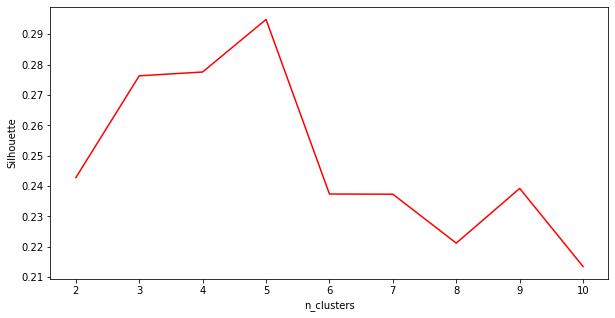

In [19]:
#Visualisasi Silhoutte Score
score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(df_red)

    siluet = silhouette_score(df_red, member, metric='euclidean')
    score.append(siluet)

plt.figure(figsize=(10,5))
plt.plot(range(2,11), score, 'r-')
plt.ylabel('Silhouette')
plt.xlabel('n_clusters')

-   Hasil dari validator menggunakan silhouette score dan silhouette plot adalah 5 memiliki score tertinggi dan terlihat lebih konsisten.

## KMeans Cluster 5

In [20]:
#membuat kmeans dengan n_clusters=5
km_5 = KMeans(n_clusters=5, random_state=8)

#prediksi cluster
label = km_5.fit_predict(df_red)

In [21]:
#memberikan label/cluster kedalam dataset
df['label'] = label
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [22]:
df.shape

(167, 11)

### Plotting Visualisasi 2d

In [23]:
pca_2 = PCA(n_components=2, whiten=True)
df_pca2d = pca_2.fit_transform(df_data)

In [24]:
df_pca2d = pd.DataFrame(df_pca2d)
df_pca2d['label'] = label
df_pca2d

,0,1,label
0,-1.590873,0.514033,4
1,0.420834,-1.141716,1
2,0.009787,-0.731388,1
3,-1.726724,1.485604,4
4,0.532996,-0.348084,1
...,...,...,...
162,-0.425094,-0.159473,1
163,0.162341,-0.922337,1
164,0.306747,-0.172441,1
165,-0.884210,-0.106716,4


<AxesSubplot:xlabel='0', ylabel='1'>

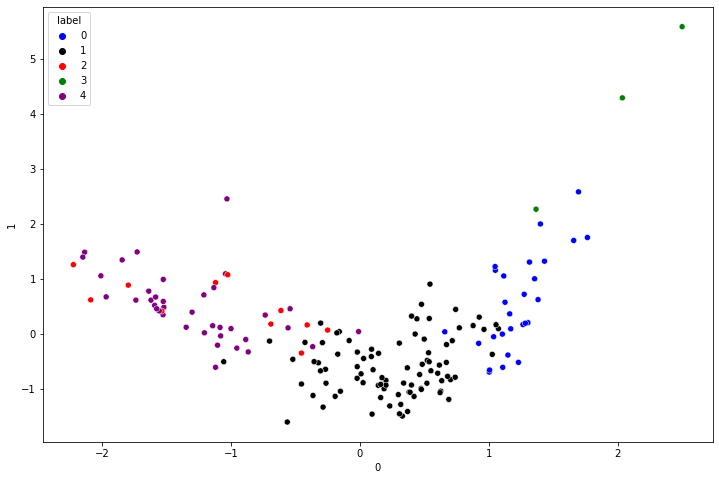

In [25]:
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_pca2d[0],df_pca2d[1], hue=df_pca2d['label'], palette=['blue','black','red','green', 'purple'])

# Conclussion

Menurut saya untuk memberikan bantuan yang efektif dan efisien adalah memberikan kepada negara-negara yang memiliki harap hidup rendah dan memiliki pendapatan rendah.

In [29]:
df['label'] = df['label'].replace([0,1,2,3,4], ['cluster 1', 'cluster 2','cluster 3', 'cluster 4','cluster 5'])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,cluster 5
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,cluster 2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,cluster 2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,cluster 5
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,cluster 2


In [30]:
cluster_1 = df.query("label == 'cluster 1'")
cluster_2 = df.query("label == 'cluster 2'")
cluster_3 = df.query("label == 'cluster 3'")
cluster_4 = df.query("label == 'cluster 4'")
cluster_5 = df.query("label == 'cluster 5'")

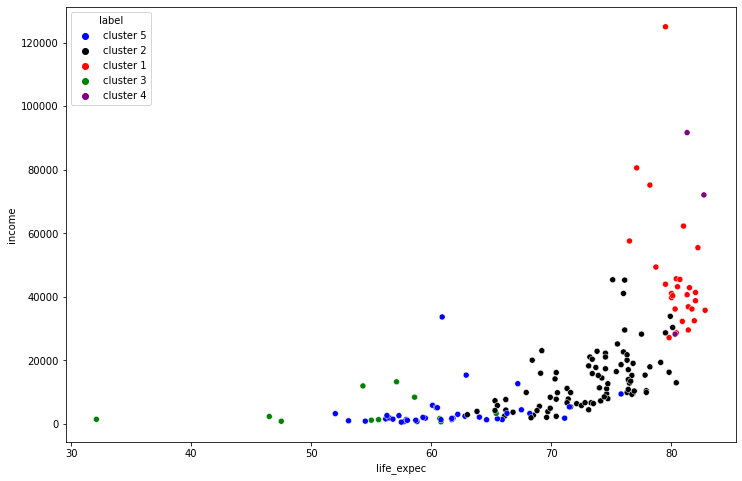

In [ ]:
sns.scatterplot(x='life_expec', y='income', hue='label', data=df, palette=['blue','black','red','green', 'purple'])
plt.show()

-   Cluster 1 memiliki karakteristik negara-negara yang memiliki harapan hidup tinggi dan memiliki income tertinggi, cluster 1 diisi oleh negara-negara maju seperti USA, Arab, Inggris dan negara-negara maju lainnya.
-   Cluster 2 memiliki karakteristik negara-negara yang memiliki harapan hidup lumayan tinggi dan memiliki income lumayan tinggi, diisi oleh negara-negara berkembang seperti Argentina, Brazil, Thailand, Indonesia, Vietnam dan negara-negara berkembang lainnya
-   Cluster 3 memiliki karakteristik negara-negara yang paling kecil memiliki harapan hidup, ini cluster dengan negara-negara miskin yang Salah satunya adalah Haiti.
-   Cluster 4 diisi oleh negara Singapore, Malta dan Luxembourg dengan karakteristik ekonomi maju dan memiliki harapn hidup tinggi.
-   Cluster 5 adalah negara-negara miskin atau negara-negara yang sedang konflik, artinya mereka memiliki income rendah dan harapan hidup rendah juga, diisi oleh negara iraq, afghanistan, nigeria, ivory coast dll.

Menurut saya memberi bantuan paling tepat adalah kepada negara-negara yang tergolong dalam cluster 3, karena mereka adalah negara-negara yang paling memiliki pendapatan rendah dan paling rendah memiliki harapan hidup.  
Khususnya adalah negara Haiti, karena itu negara yang paling memiliki harapan hidup rendah.

Karakteristik cluster 3 dan 5 lebih banyak dari benua afrika, sama seperti yang saya lakukan ketika di EDA negara-negara miskin dan memiliki harapan hidup rendah adalah dari negara-negara afrika.